# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
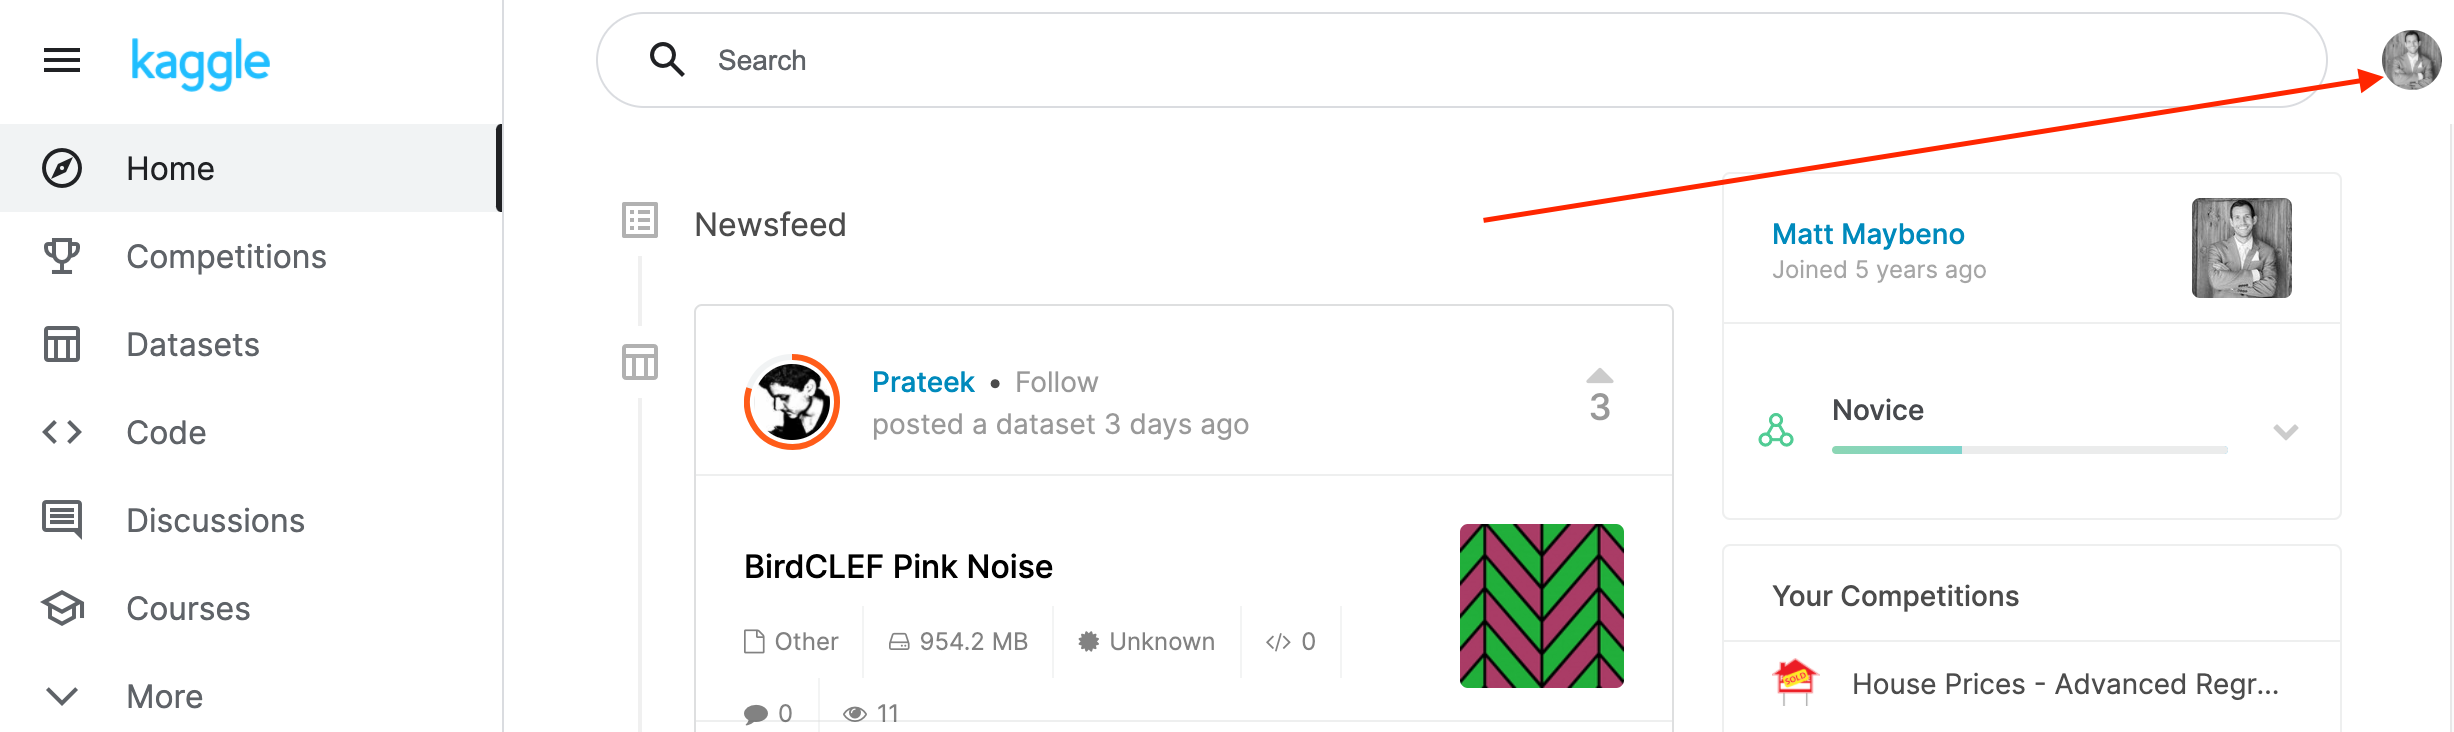
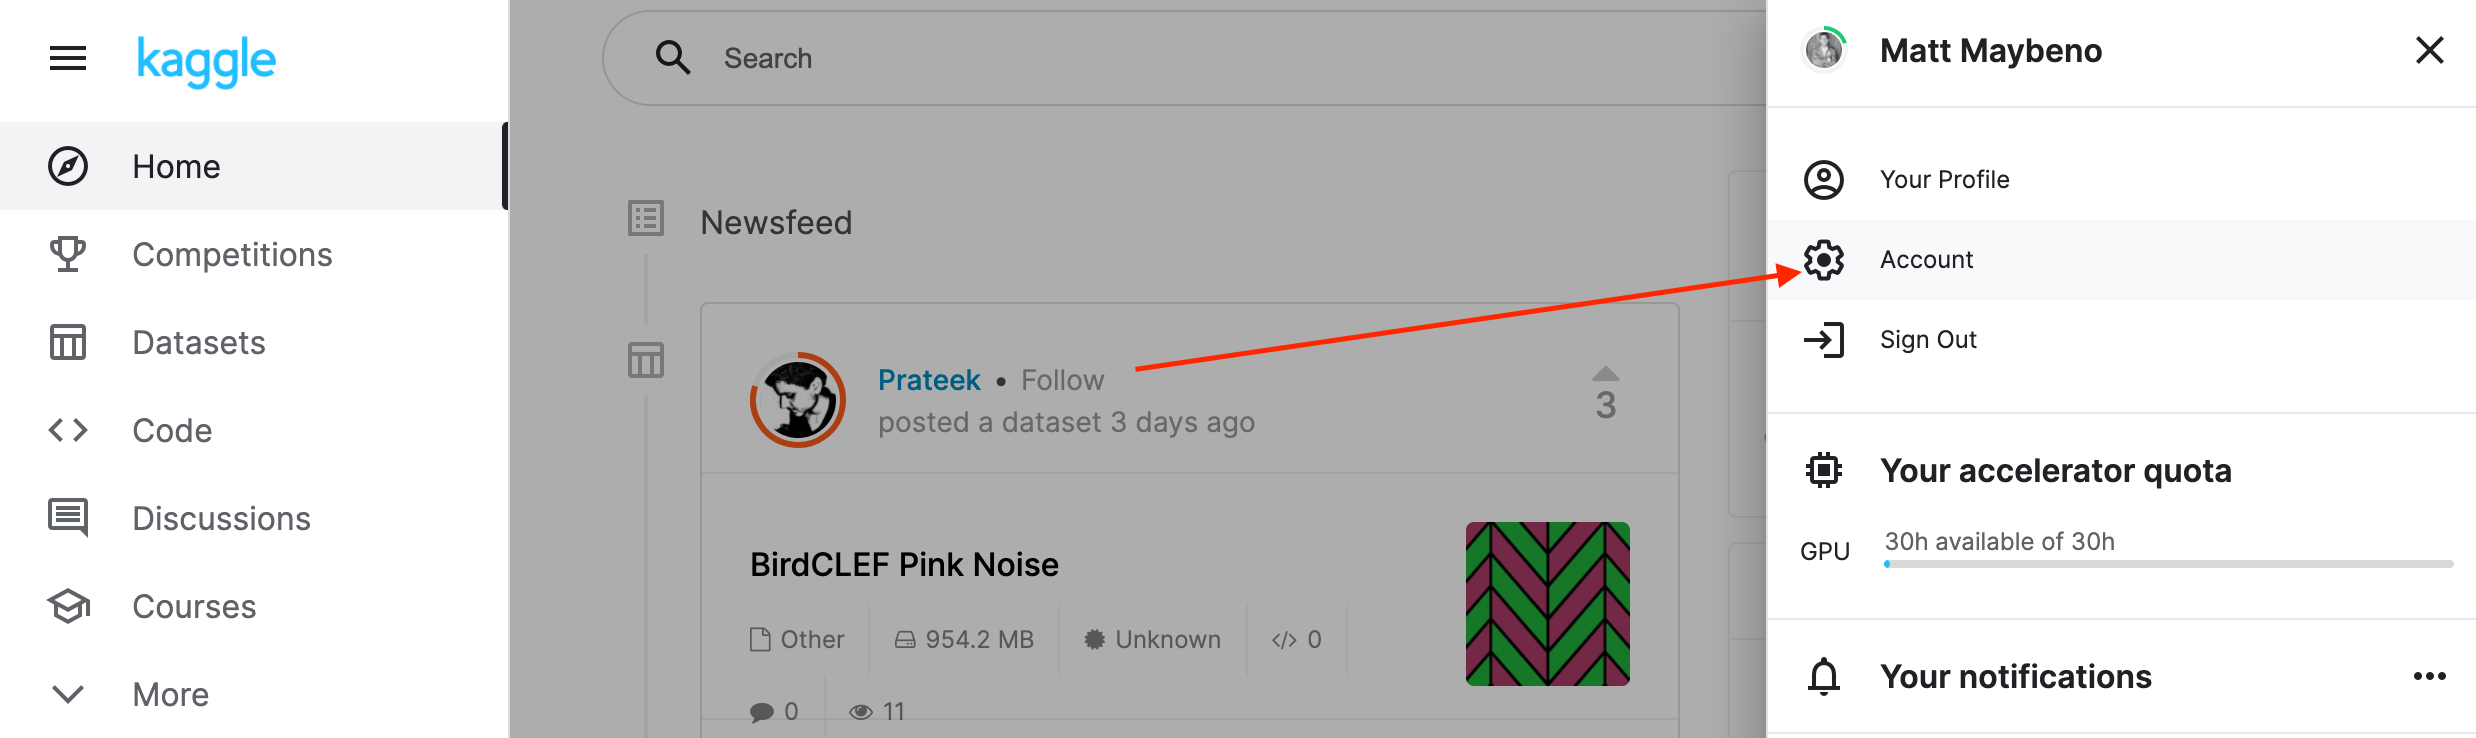
2. Scroll down to API and click Create New API Token.
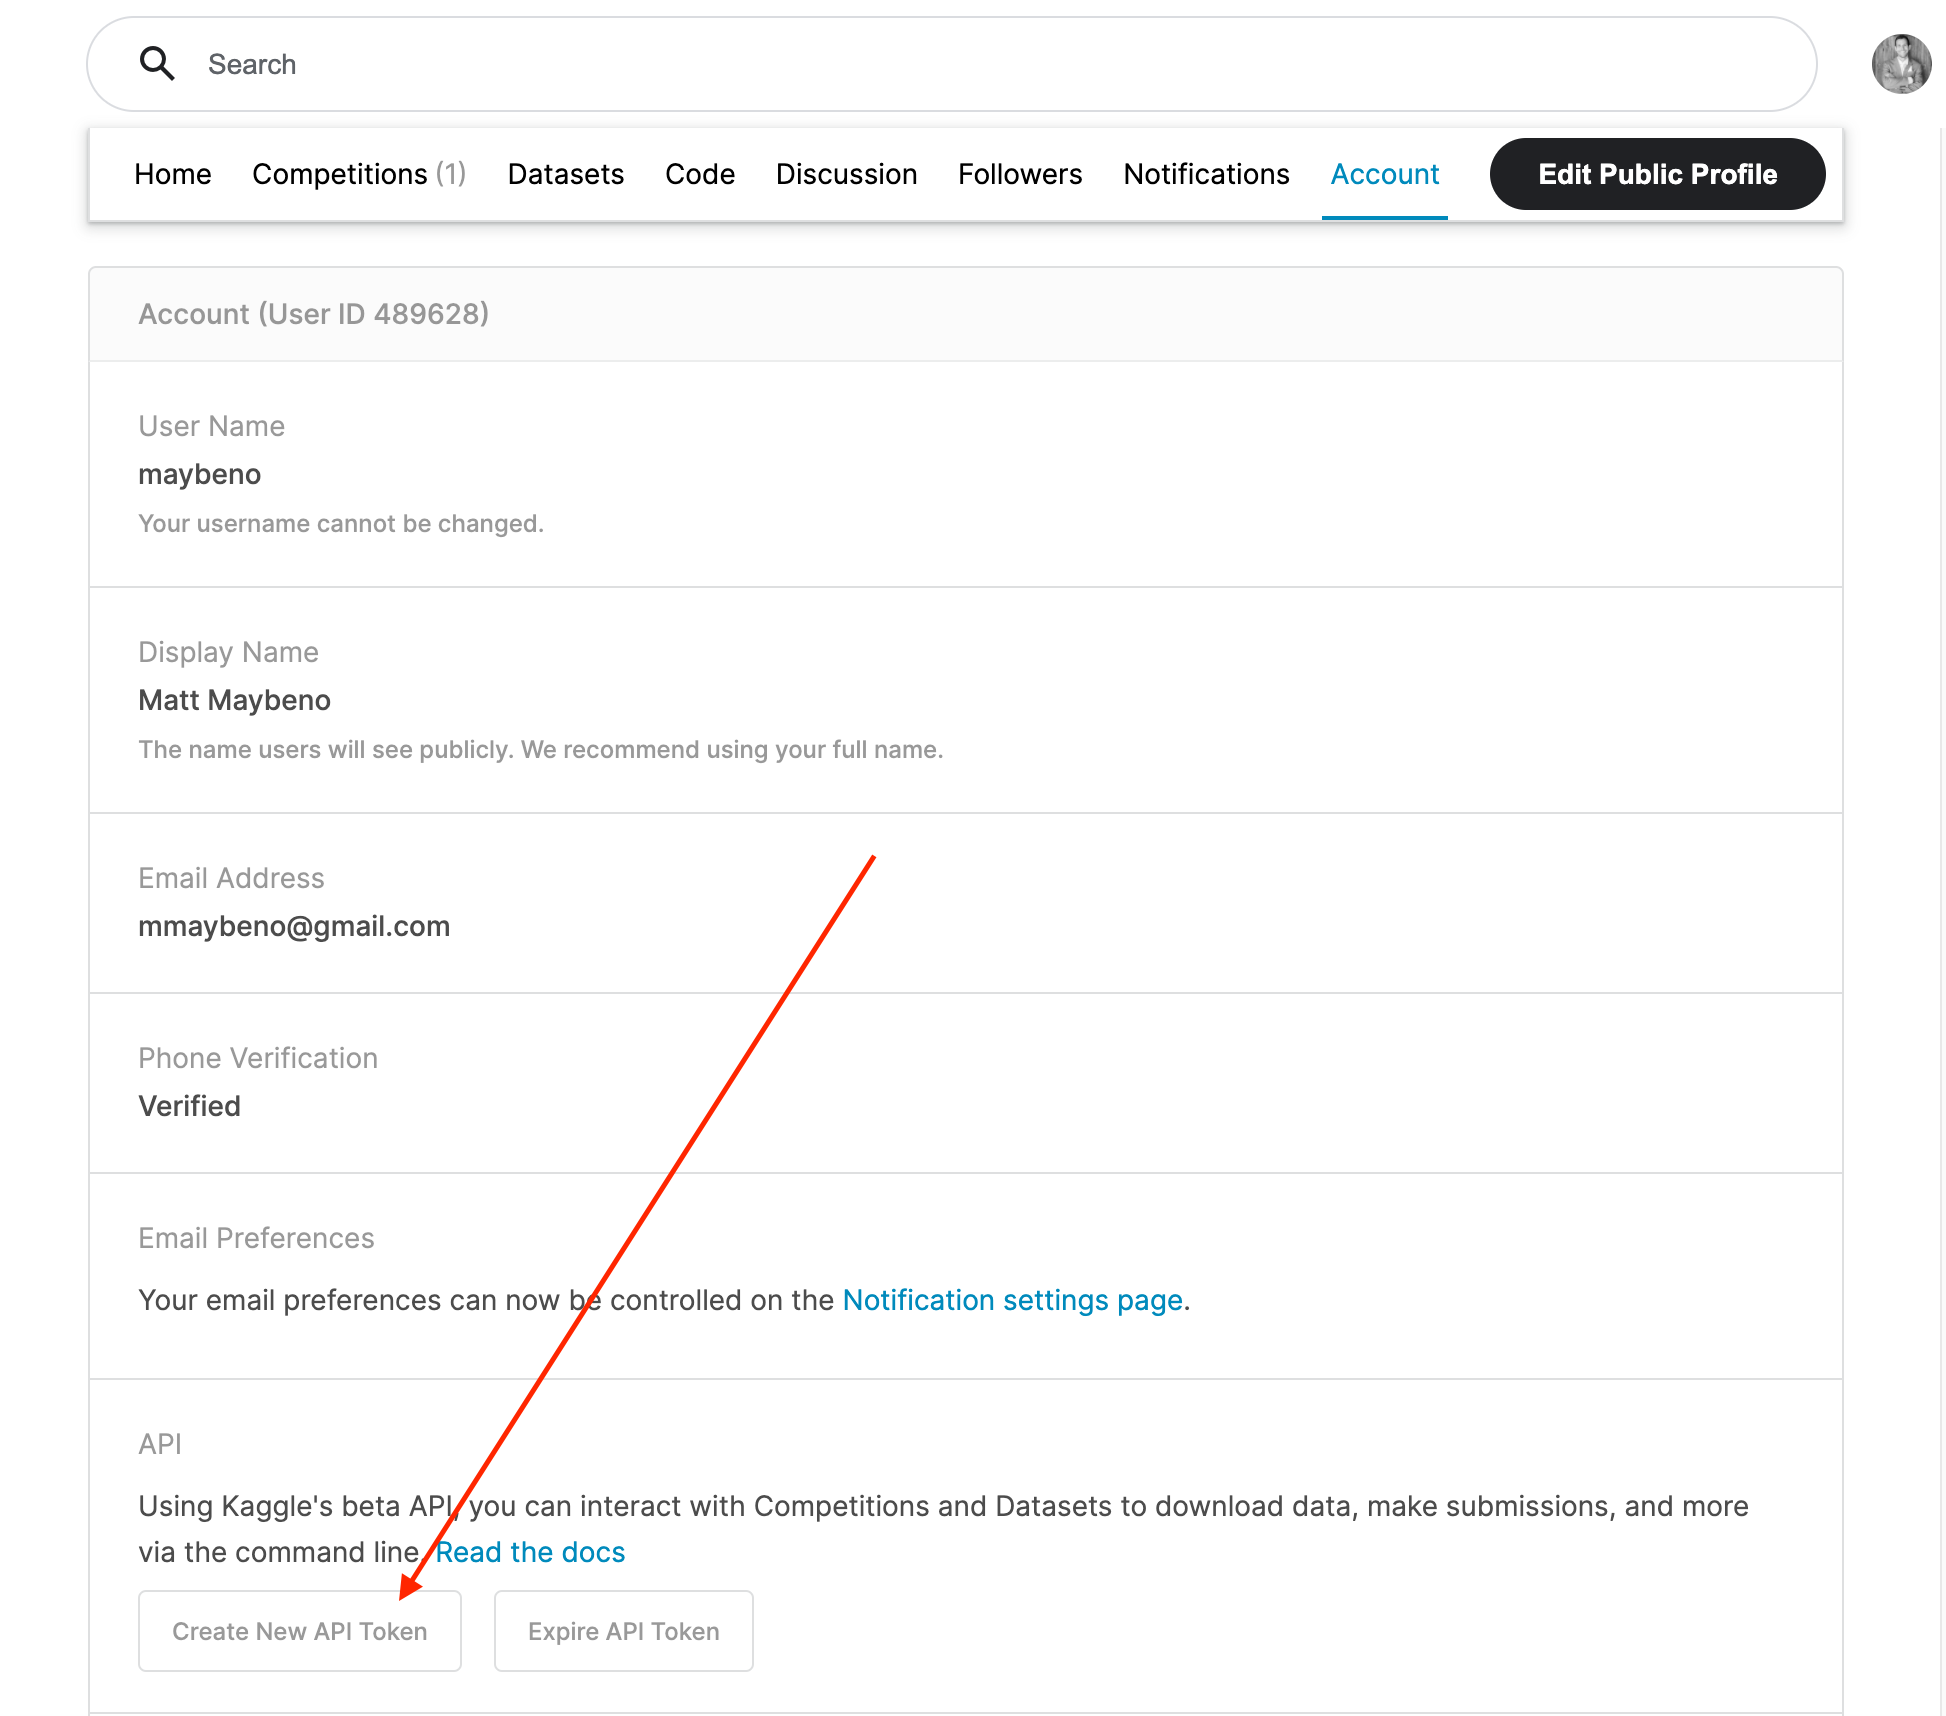
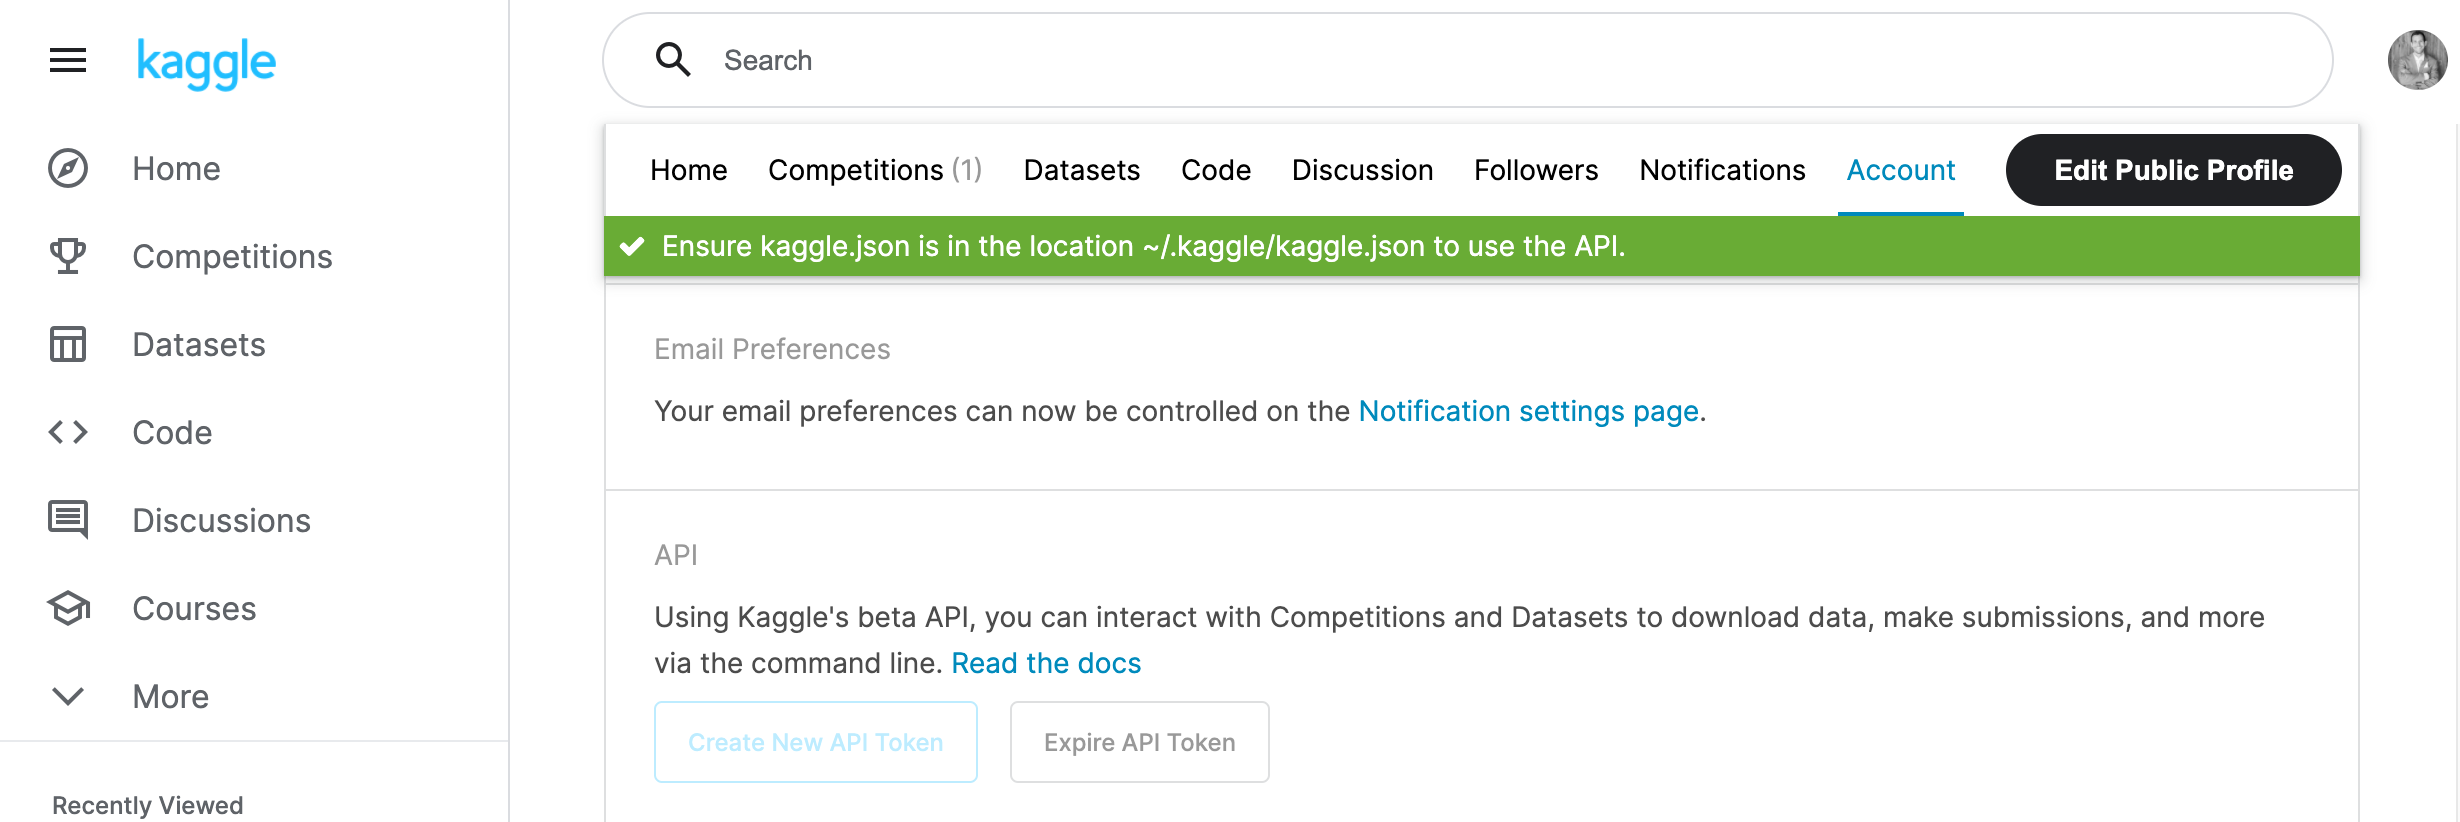
3. Open up `kaggle.json` and use the username and key.
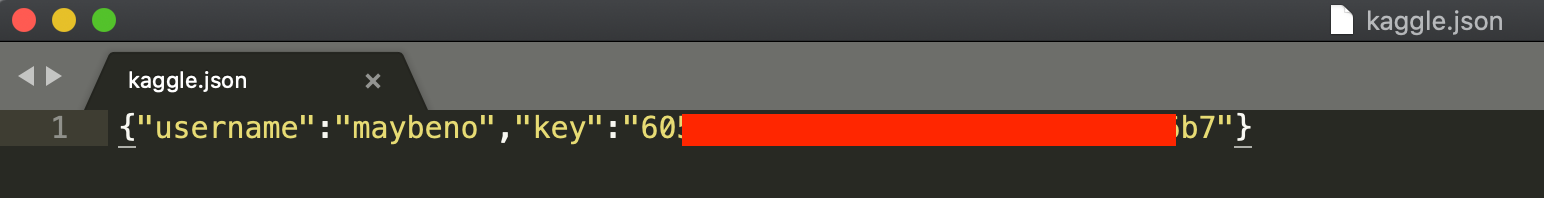

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [9]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 155.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 196.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 284.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 255.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 193.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 134.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.6/103.6 kB 158.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 228.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 232.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 233.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 242.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 291.9 MB/s eta 0:00:00
  

### Setup Kaggle API Key

In [12]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [42]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "xxxxxx"
kaggle_key = "xxxxxxxxxxxxxxxxx"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
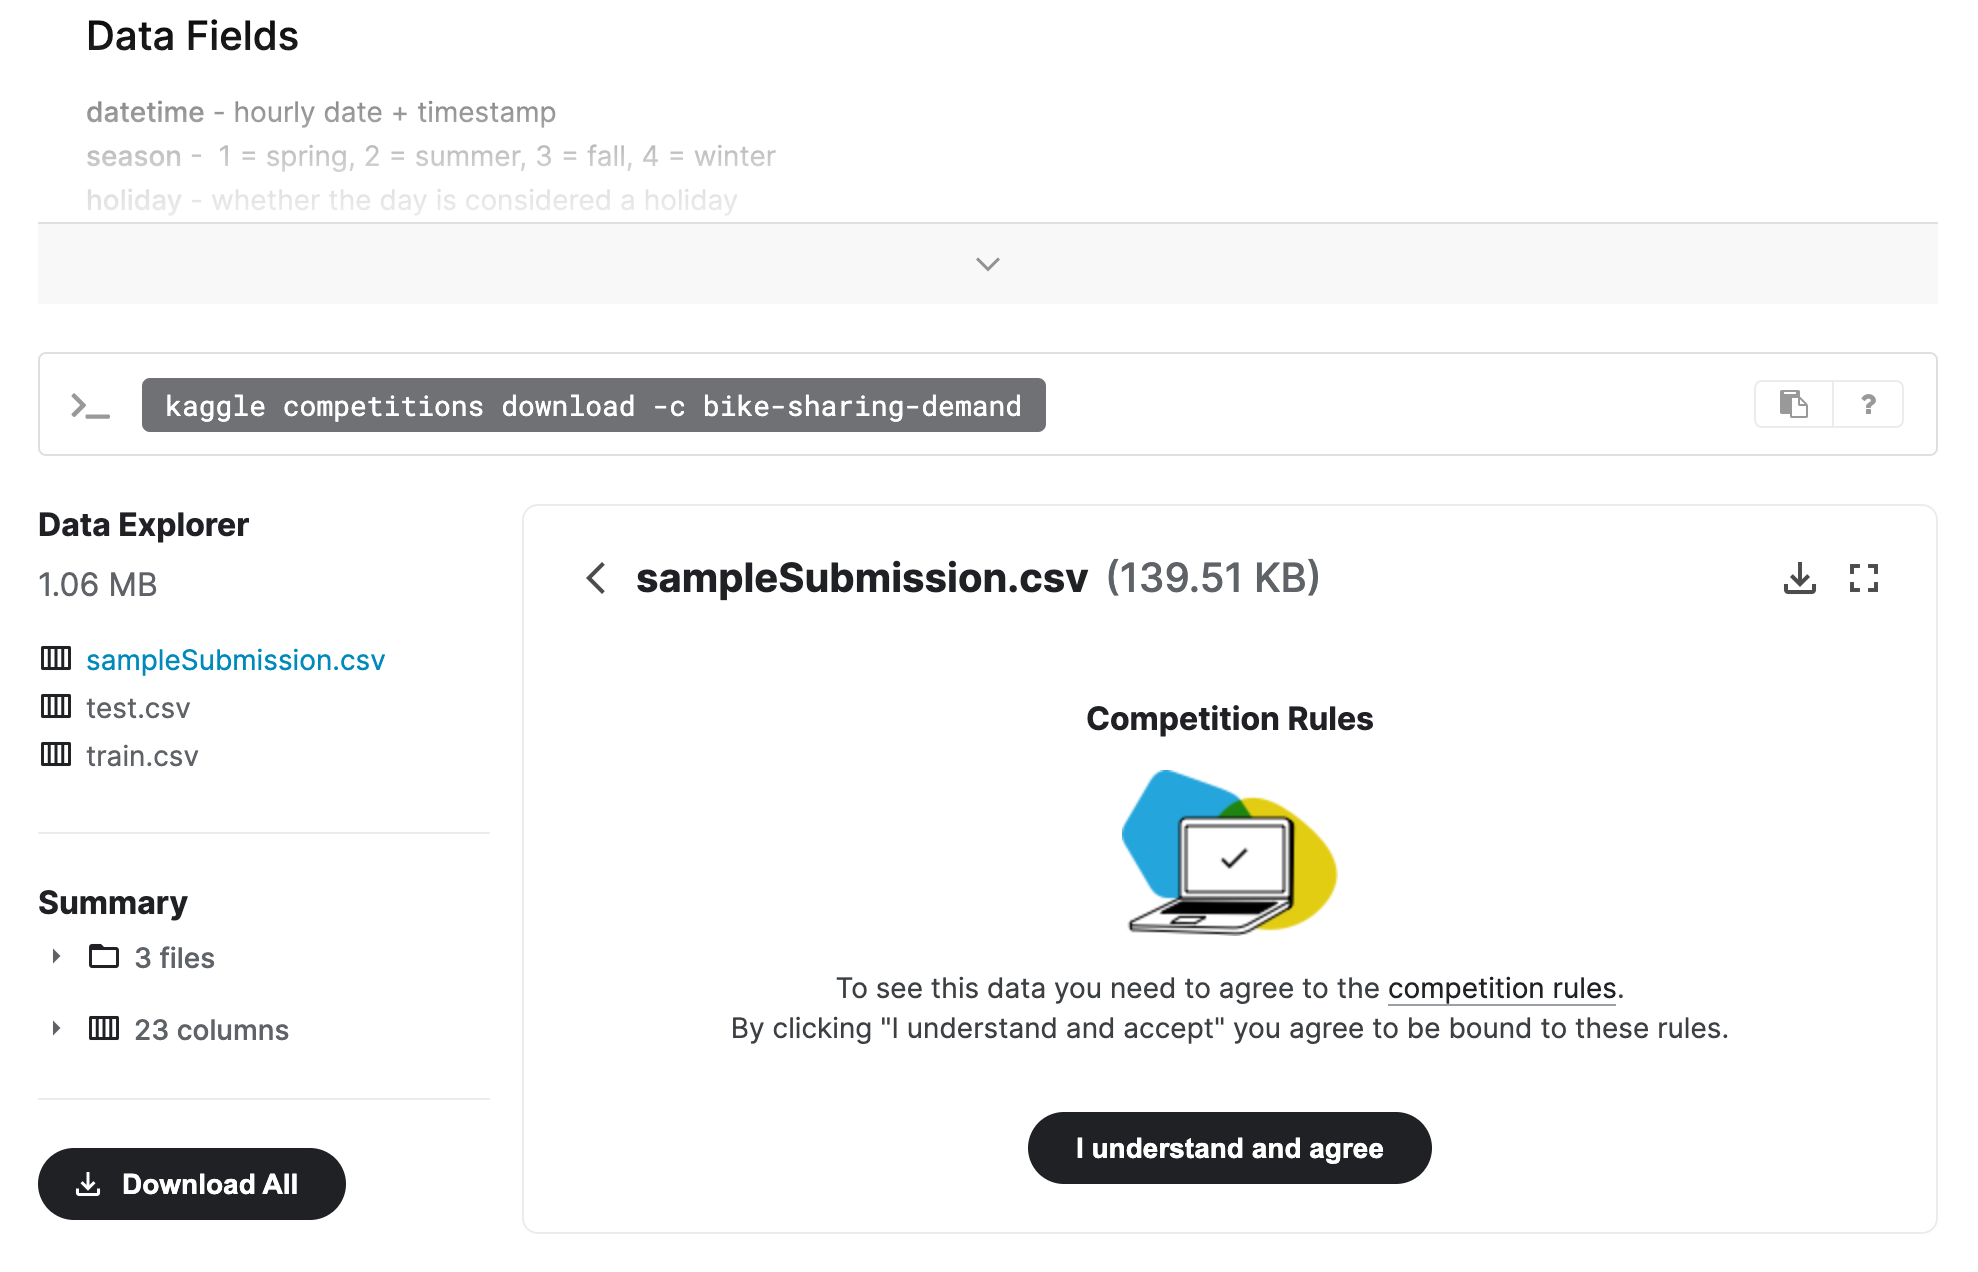

In [5]:
# Based on help of a mentor
# Added "-q" 
!pip install -q kaggle

# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [23]:
import pandas as pd
!pip install autogluon.tabular[lightgbm]==0.6.2
!pip install autogluon.tabular[catboost]==0.6.2
!pip install autogluon.tabular[fastai]==0.6.2
!pip install autogluon.tabular[xgboost]==0.6.2
!pip install autogluon.tabular[torch]==0.6.2
from autogluon.tabular import TabularPredictor

  Using cached autogluon.tabular-0.6.2-py3-none-any.whl (292 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached autogluon.core-0.6.2-py3-none-any.whl (226 kB)
  Using cached autogluon.features-0.6.2-py3-none-any.whl (60 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached psutil-5.9.5-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (282 kB)
  Using cached dask-2021.11.2-py3-none-any.whl (1.0 MB)
  Using cached distributed-2021.11.2-py3-none-any.whl (802 kB)
  Using cached autogluon.common-0.6.2-py3-none-any.whl (44 kB)
  Attempting uninstall: psutil
    Found existing installation: psutil 5.6.7
    Uninstalling psutil-5.6.7:
      Successfully

In [26]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [28]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [30]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error",
learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
time_limit=600, 
presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230524_100649/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230524_100649/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	42.59s	 = Training   runtime
	3.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 341.96s of the 541.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	11.51s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 327.54s of the 527.46s of remaining time.
	-116.5443	 = Validation score   (-root_mean_squared_error)
	9.95s	 = Training   runtime
	0.52s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 314.29s of the 514.21s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5465.
	Ran out of time, early stopping on iteration 5737.
	Ran out of time, early stopping on iteration 5770.
	Ran out of time, early stopping on iteration 5960.
	-130.4821	 = Validation score   (-root_mean_squared_error)
	224.47s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 89.04s of the 288.96s of remaining time.
	-124.5881	 = Validation score

[1000]	valid_set's rmse: 60.8734
[2000]	valid_set's rmse: 60.4731
[1000]	valid_set's rmse: 61.4785
[2000]	valid_set's rmse: 60.0442
[1000]	valid_set's rmse: 62.687
[2000]	valid_set's rmse: 61.8381
[1000]	valid_set's rmse: 63.9952
[2000]	valid_set's rmse: 62.274
[1000]	valid_set's rmse: 58.0016
[2000]	valid_set's rmse: 57.3764
[1000]	valid_set's rmse: 62.8903
[2000]	valid_set's rmse: 62.1792
[1000]	valid_set's rmse: 62.5097
[2000]	valid_set's rmse: 61.551
[3000]	valid_set's rmse: 61.5538
[1000]	valid_set's rmse: 58.2732
[2000]	valid_set's rmse: 57.3223


	-60.3467	 = Validation score   (-root_mean_squared_error)
	34.2s	 = Training   runtime
	1.48s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 160.02s of the 160.0s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.0586	 = Validation score   (-root_mean_squared_error)
	9.63s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 149.62s of the 149.6s of remaining time.
	-53.2885	 = Validation score   (-root_mean_squared_error)
	27.6s	 = Training   runtime
	0.6s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 118.91s of the 118.89s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1966.
	-55.6976	 = Validation score   (-root_mean_squared_error)
	84.03s	 = Training   runtime
	0.04s	 = Validation r

### Review AutoGluon's training run with ranking of models that did the best.

In [32]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.559299       7.069429  440.031275                0.000747           0.308597            3       True         17
1   RandomForestMSE_BAG_L2  -53.288517       6.075842  400.574116                0.597795          27.596398            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.744122       6.059590  381.004445                0.581543           8.026727            2       True         15
3          LightGBM_BAG_L2  -55.058611       5.626300  382.606070                0.148253           9.628351            2       True         12
4          CatBoost_BAG_L2  -55.697616       5.519557  457.010623                0.041510          84.032904            2       True         14
5   NeuralNetFastAI_BAG_L2  -57.212452       5.741090  394.471202         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.546199084

### Create predictions from test dataset

In [33]:
predictions = predictor.predict(test)
predictions.head()

0    24.194183
1    40.655968
2    44.482704
3    47.768269
4    51.512215
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [34]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      102.125526
std        89.043137
min         2.822075
25%        25.078621
50%        67.990051
75%       171.609024
max       359.872162
Name: count, dtype: float64

In [35]:
# How many negative values do we have?
predictions[predictions<0]

Series([], Name: count, dtype: float32)

In [36]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [37]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [43]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 444kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [44]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-24 10:24:07  first raw submission               complete  1.74997      1.74997       
submission_new_hpo.csv       2023-05-24 07:39:57  new features with hyperparameters  complete  0.47101      0.47101       
submission_new_features.csv  2023-05-24 05:56:39  new features                       complete  0.69405      0.69405       
submission_new_features.csv  2023-05-24 05:54:39  new features                       complete  0.69405      0.69405       


#### Initial score of `1.74997`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

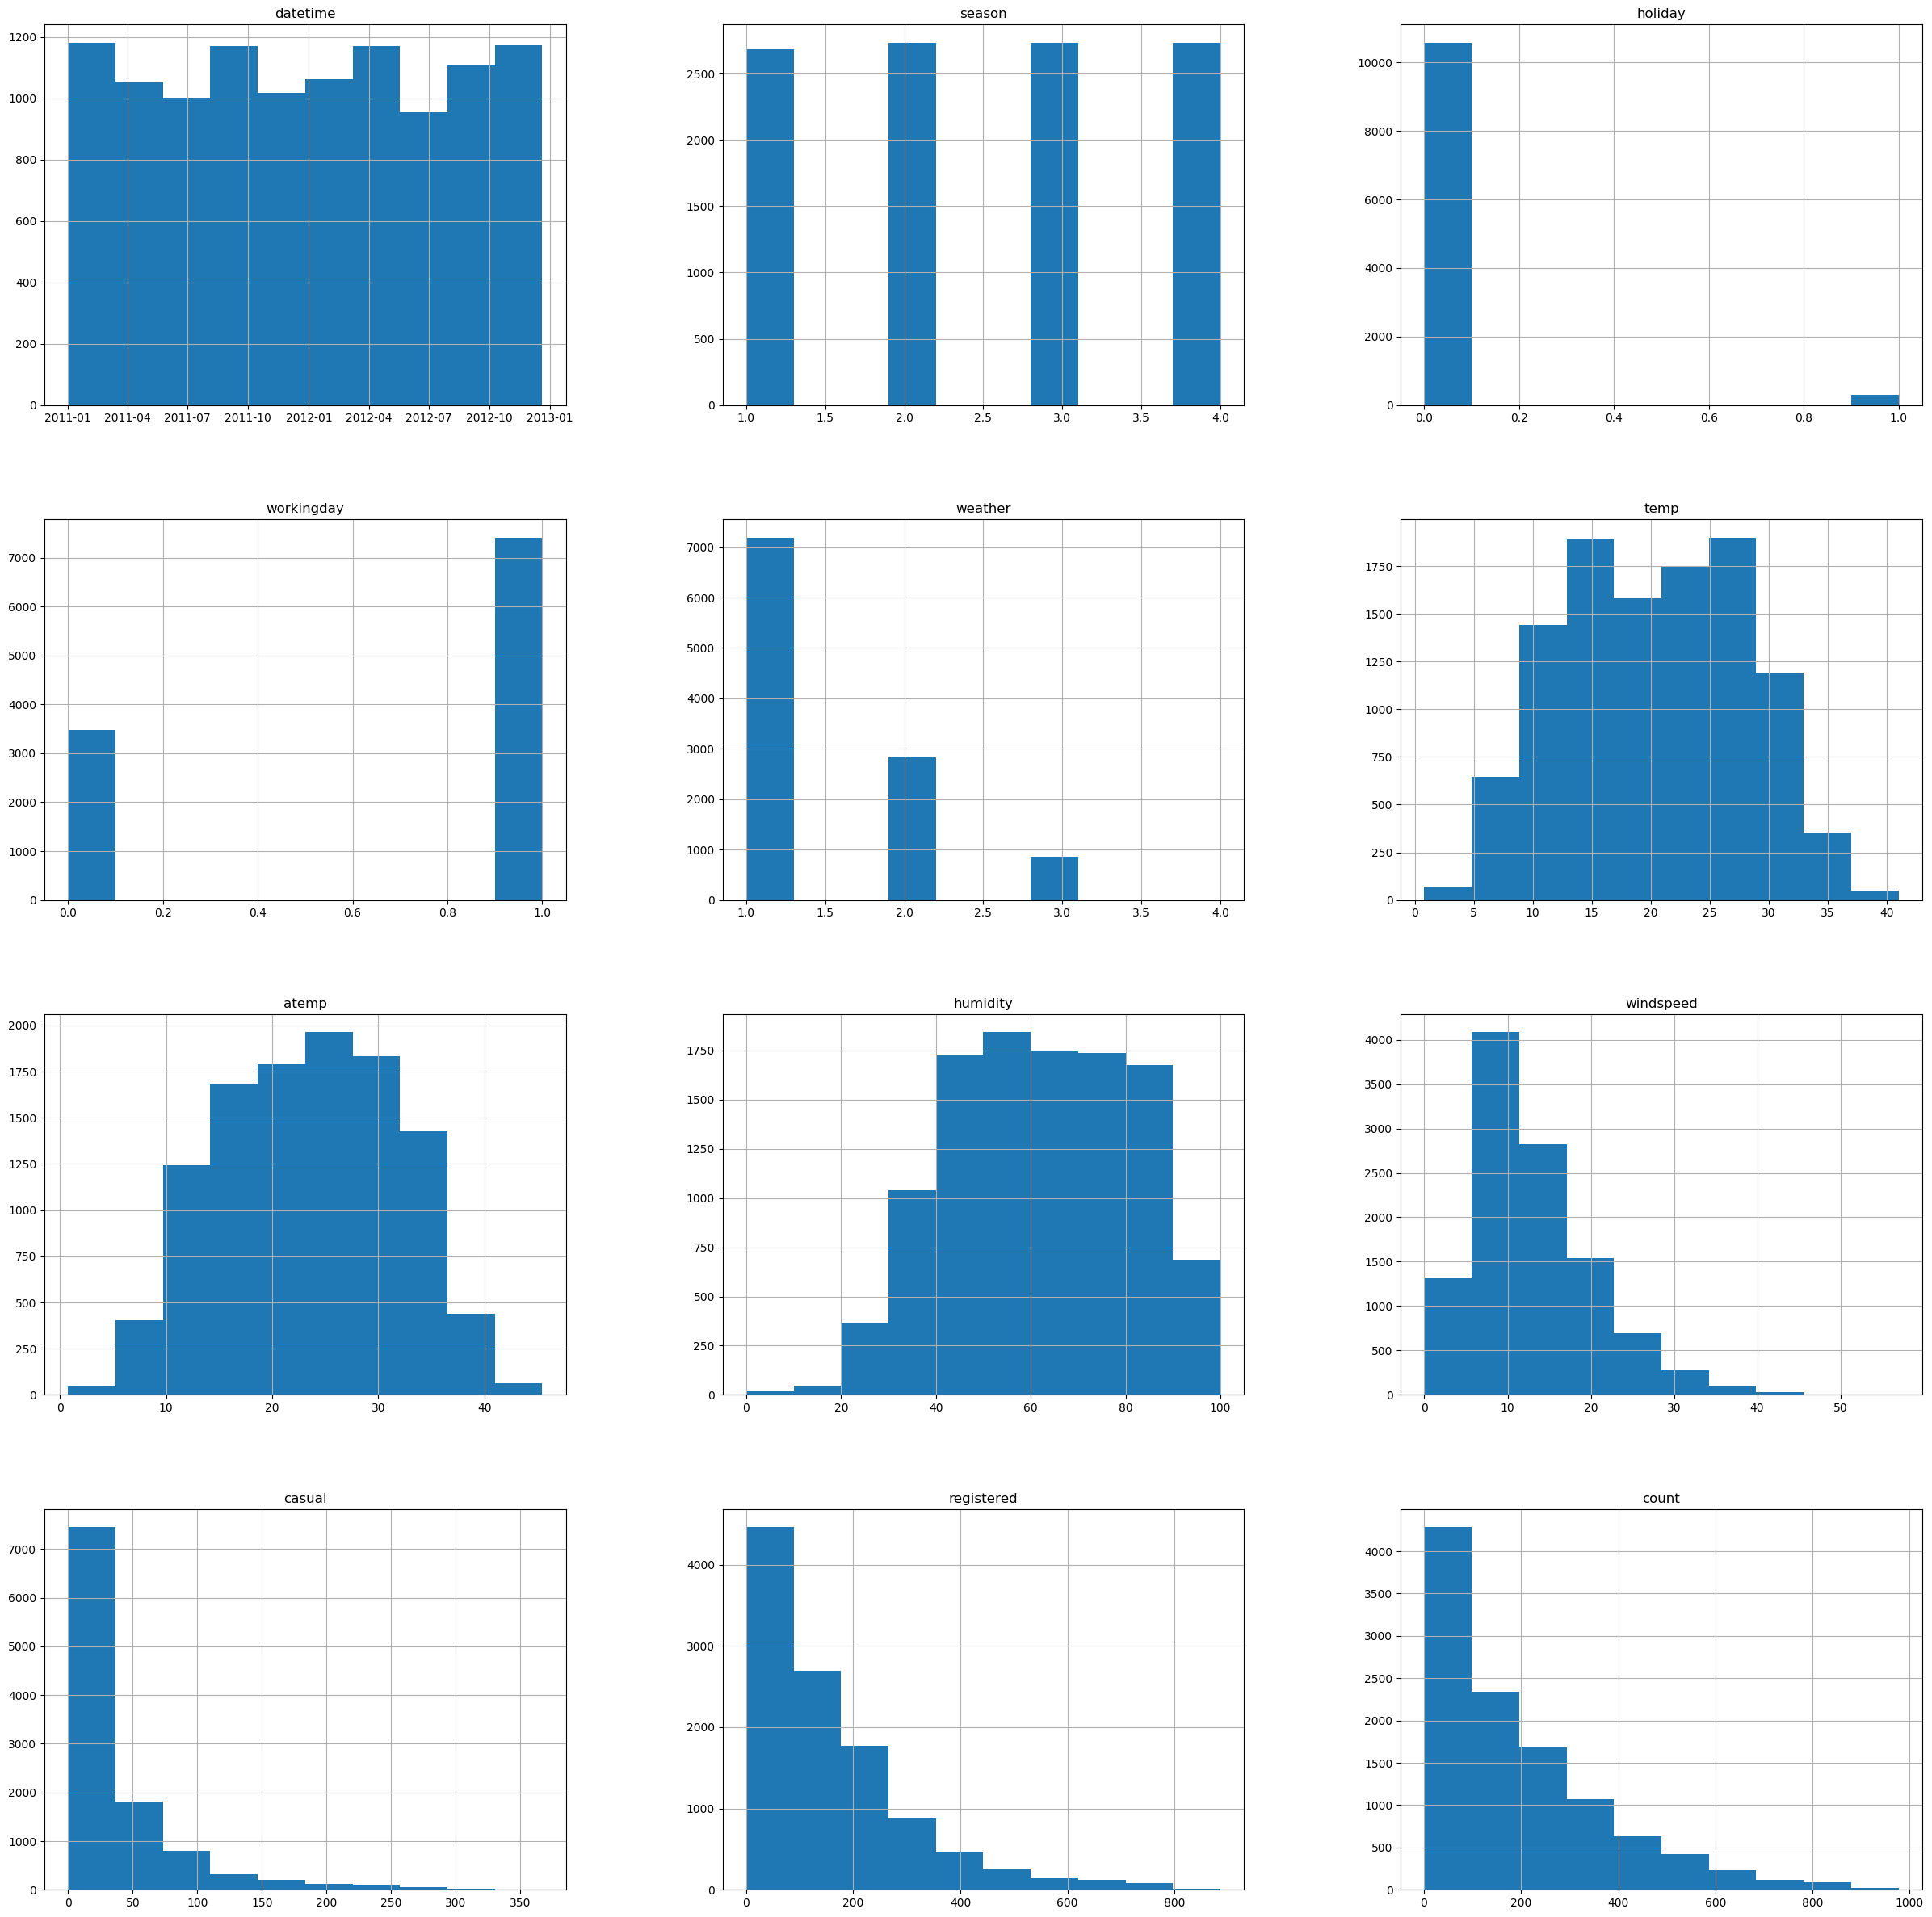

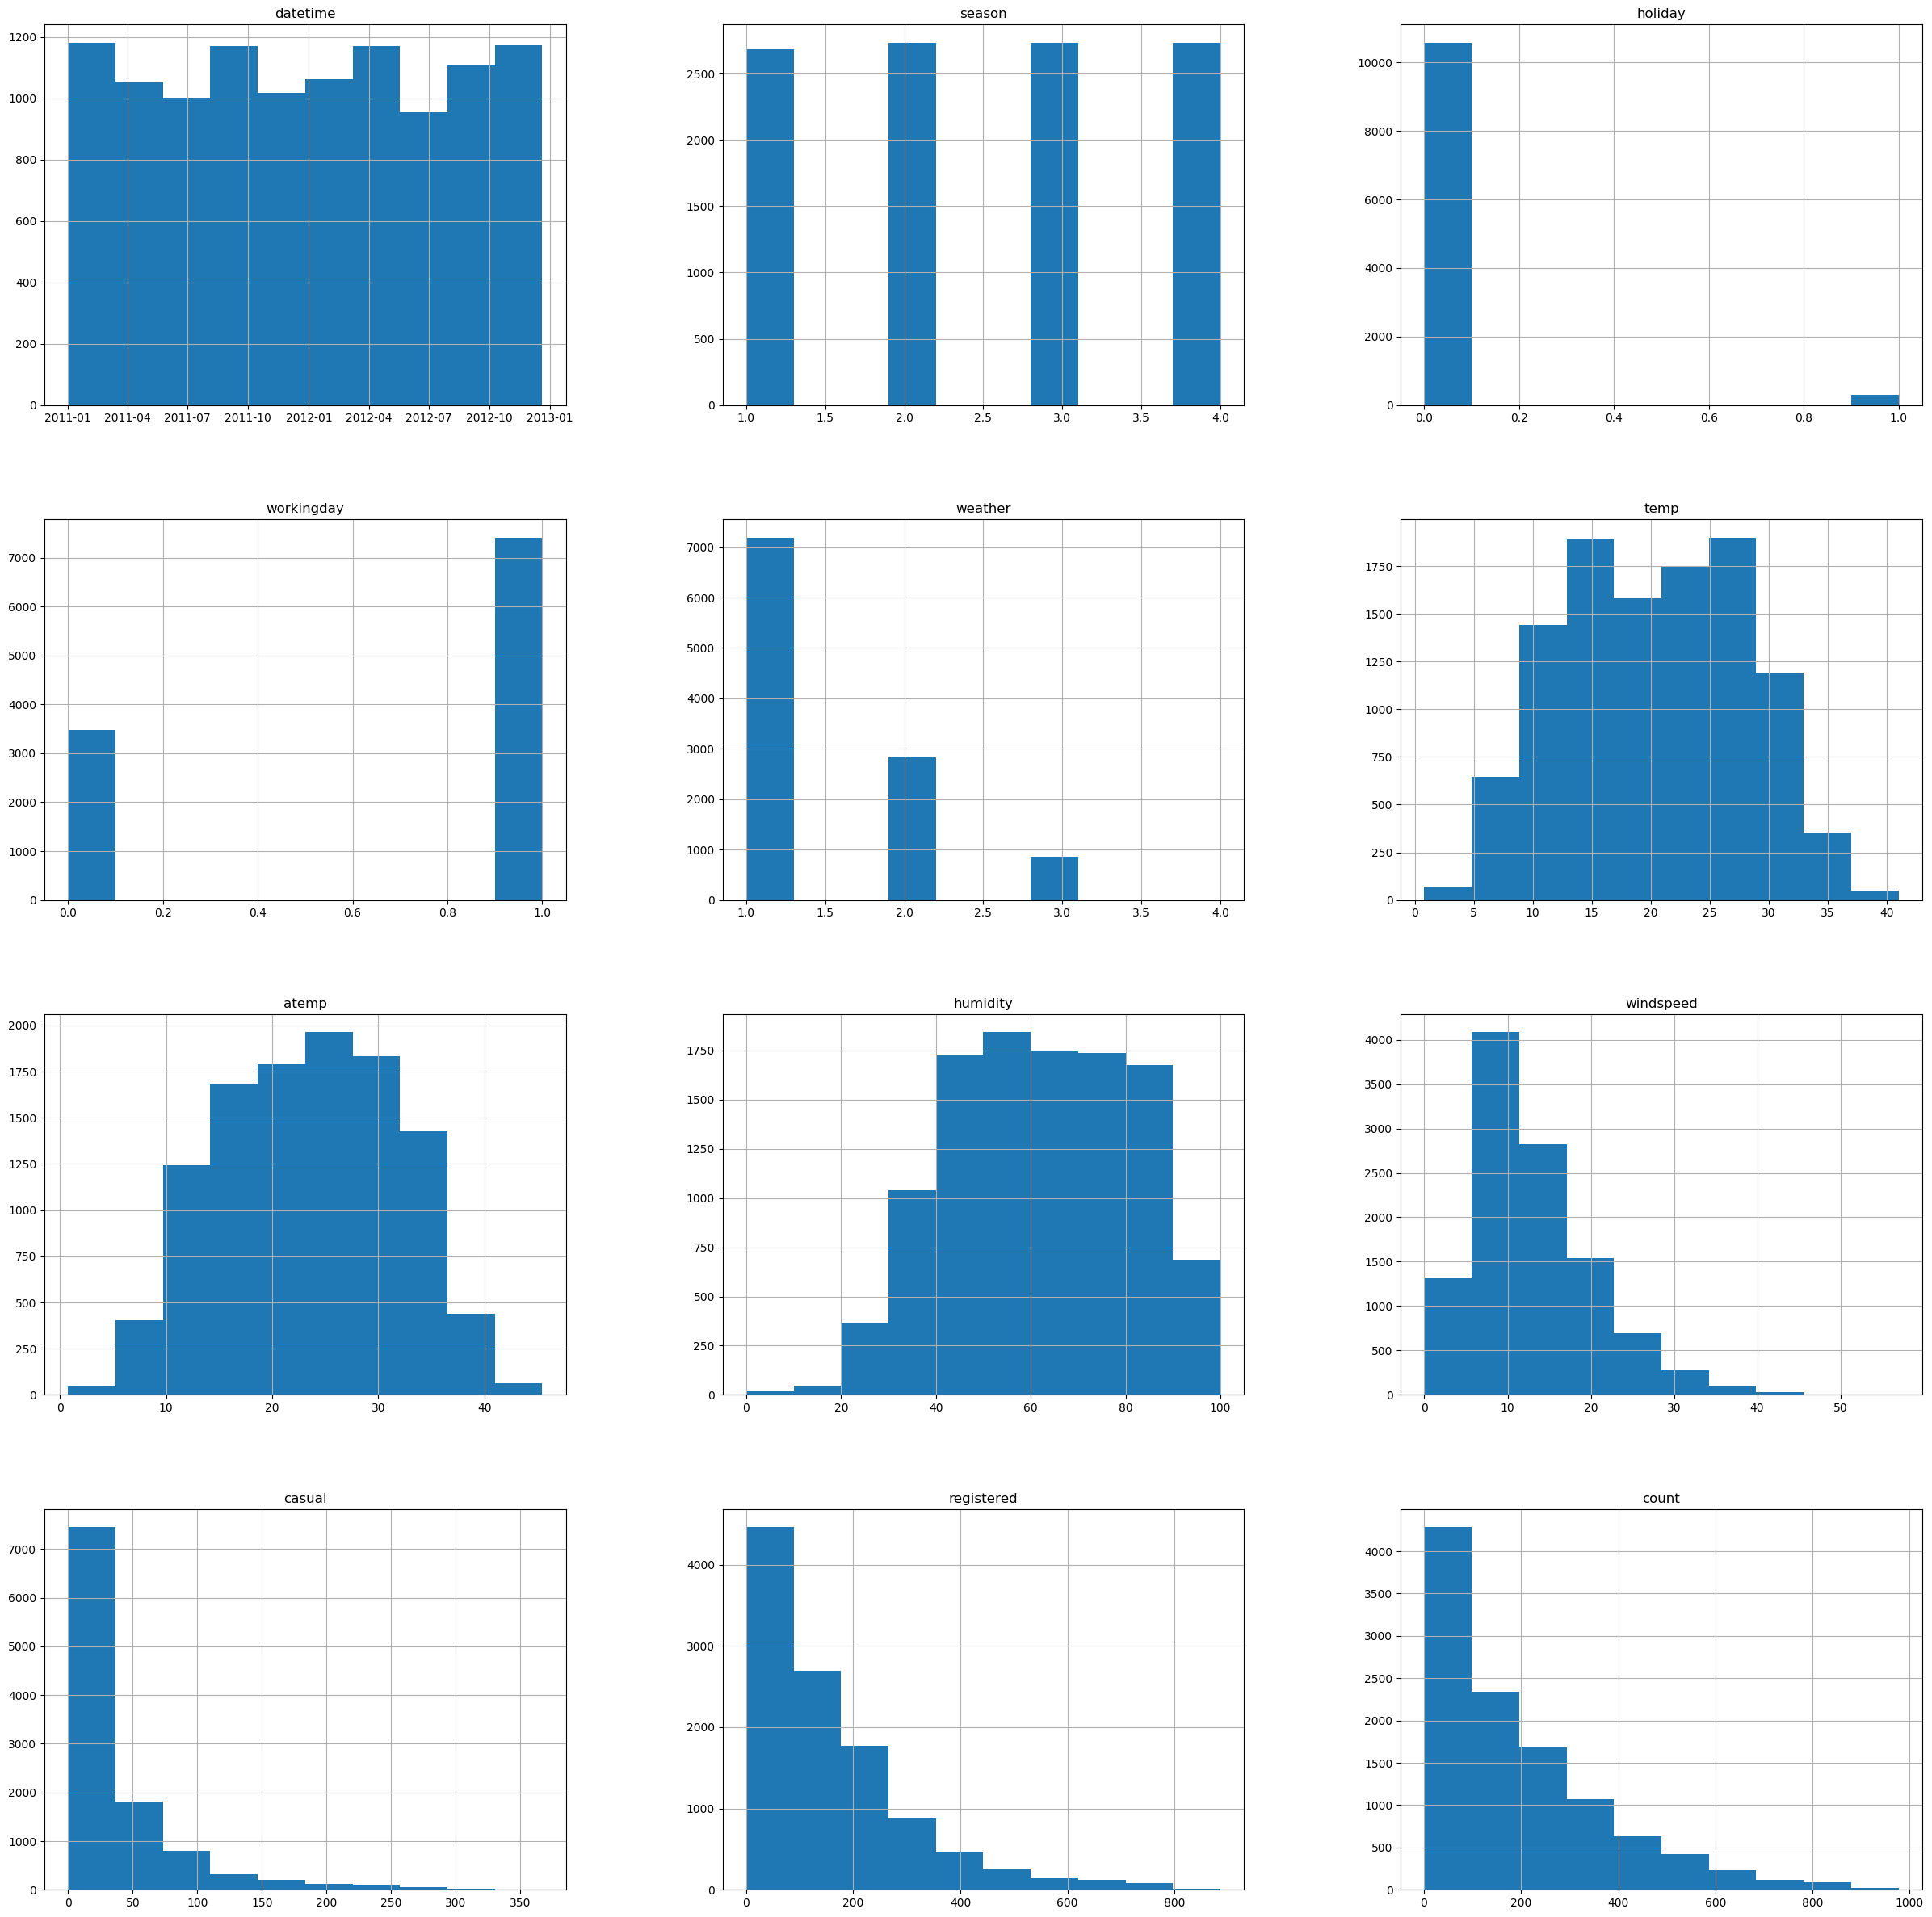

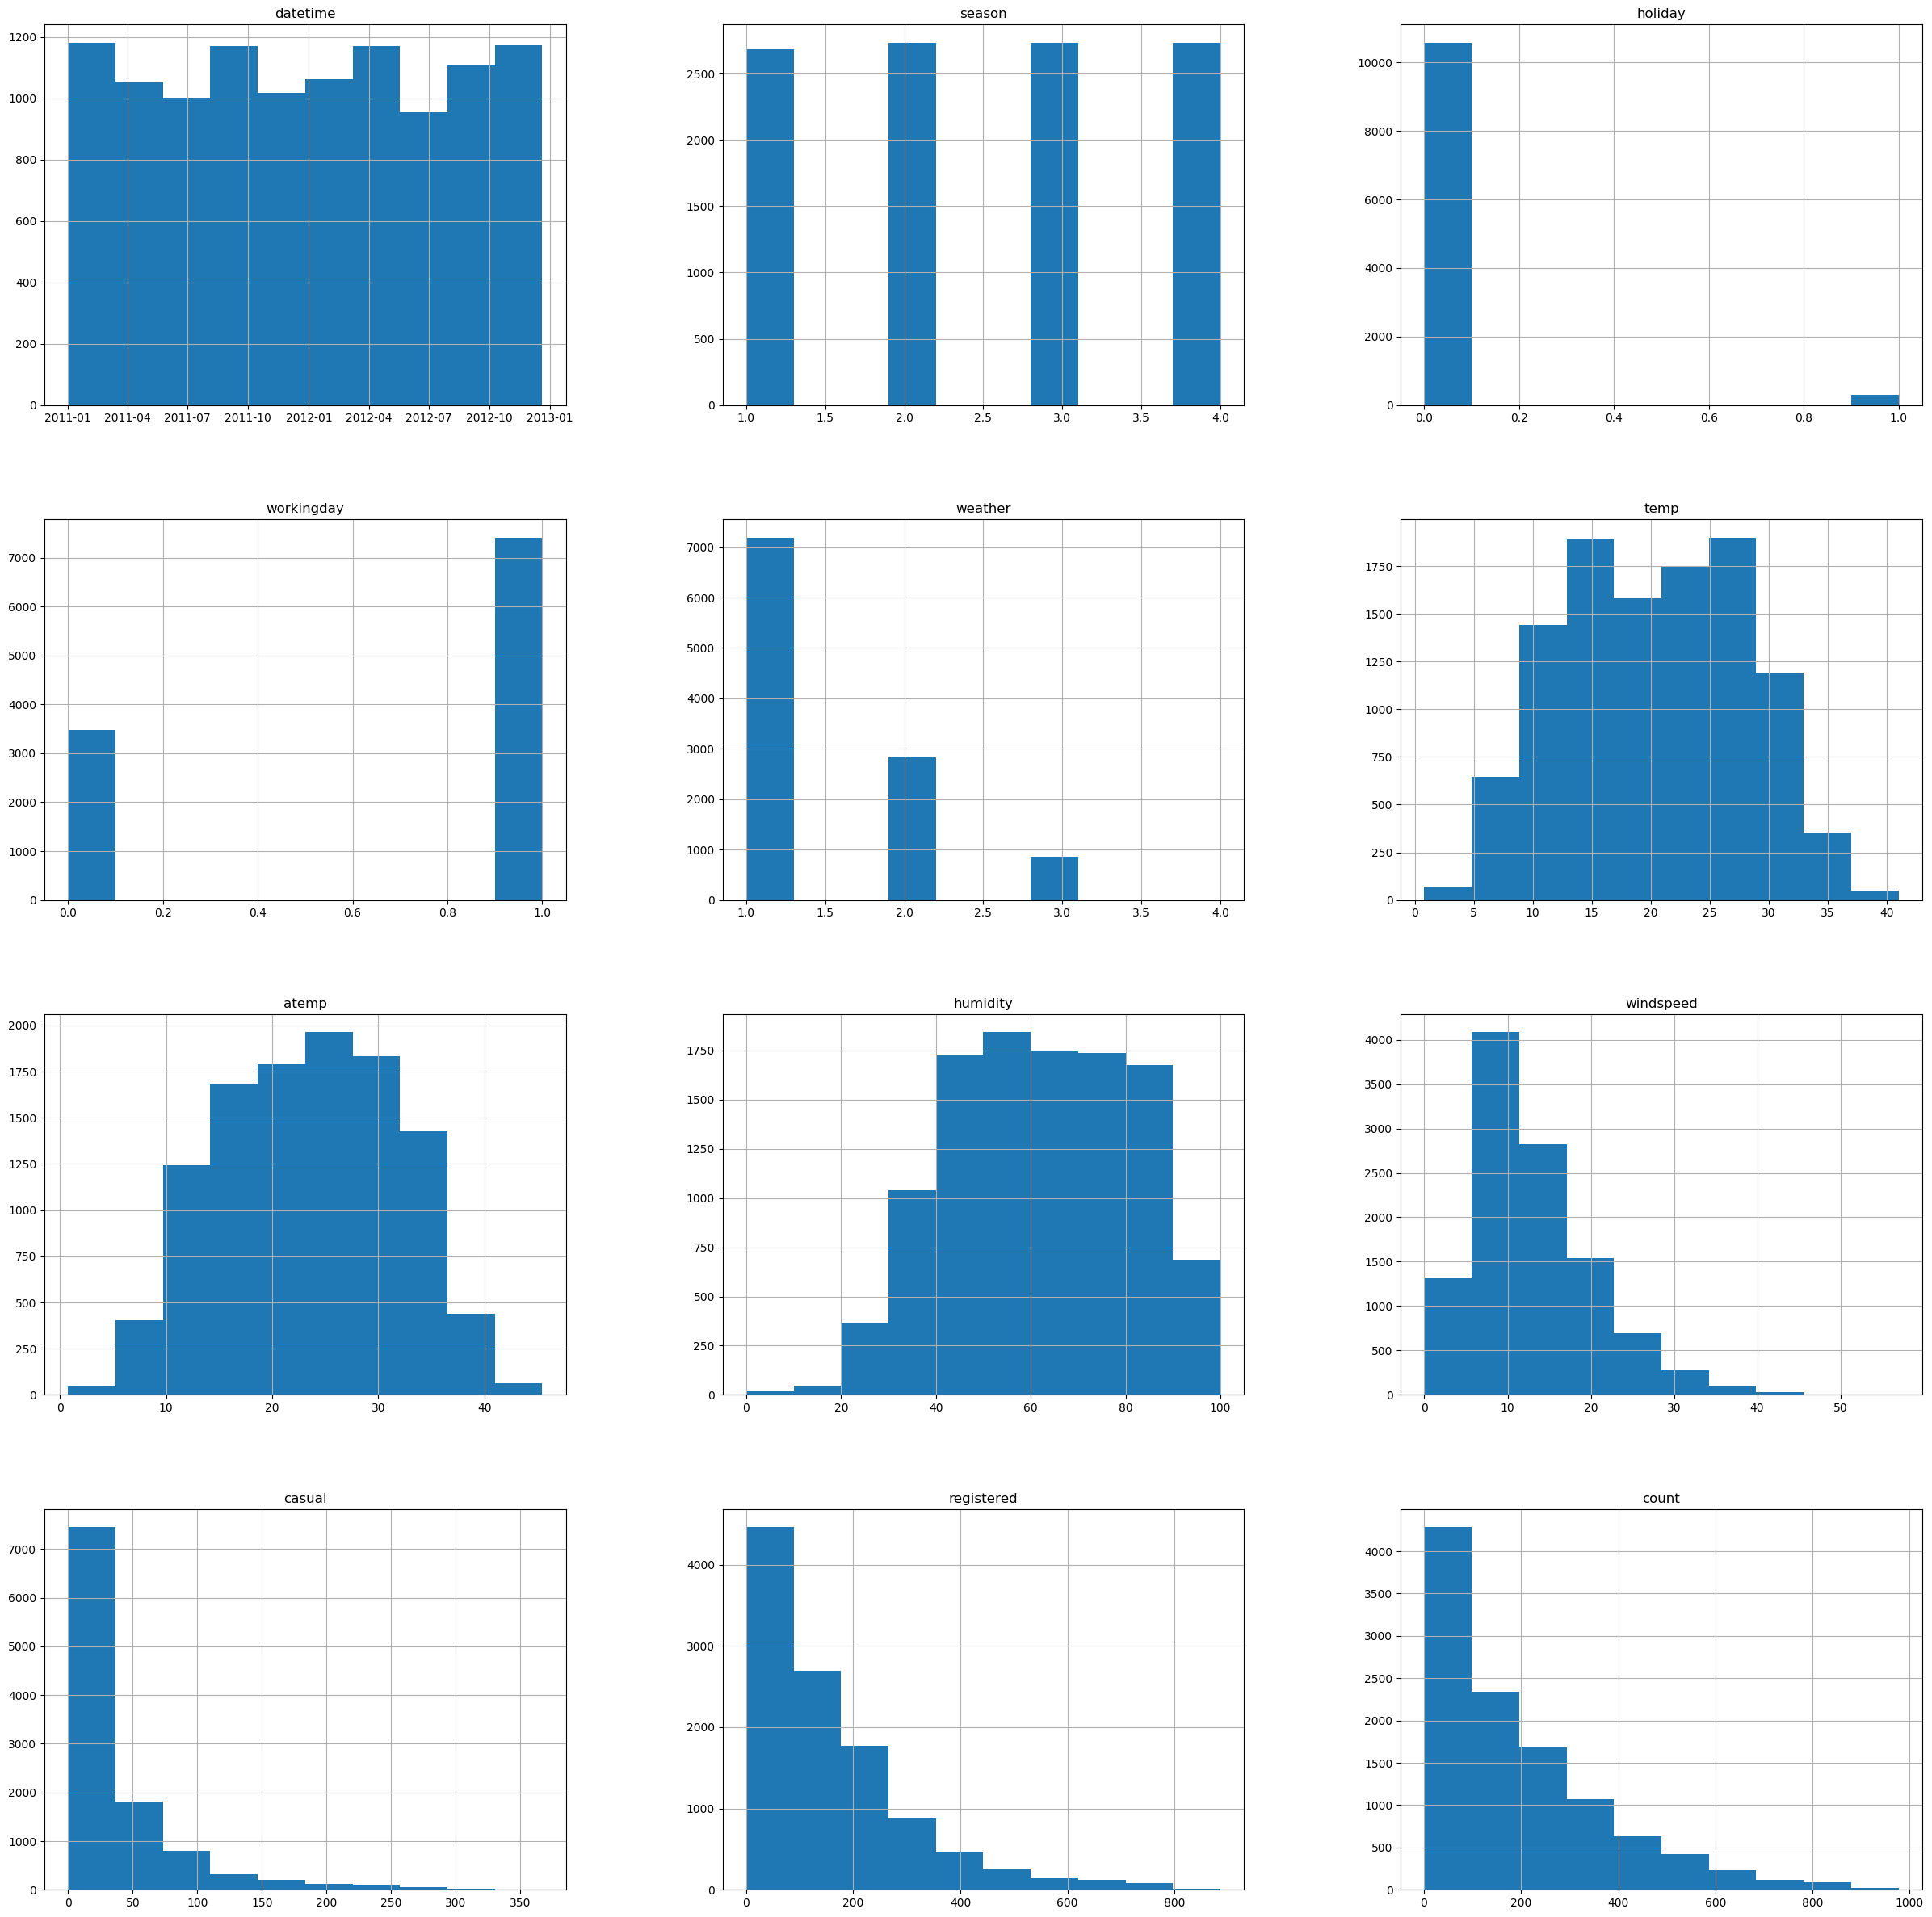

In [47]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt
train.hist(figsize=(30,30))
plt.show()

In [48]:
# create a new feature
# for year, month, day, and hour from the datetime column in the train and test dataset
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [49]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [50]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


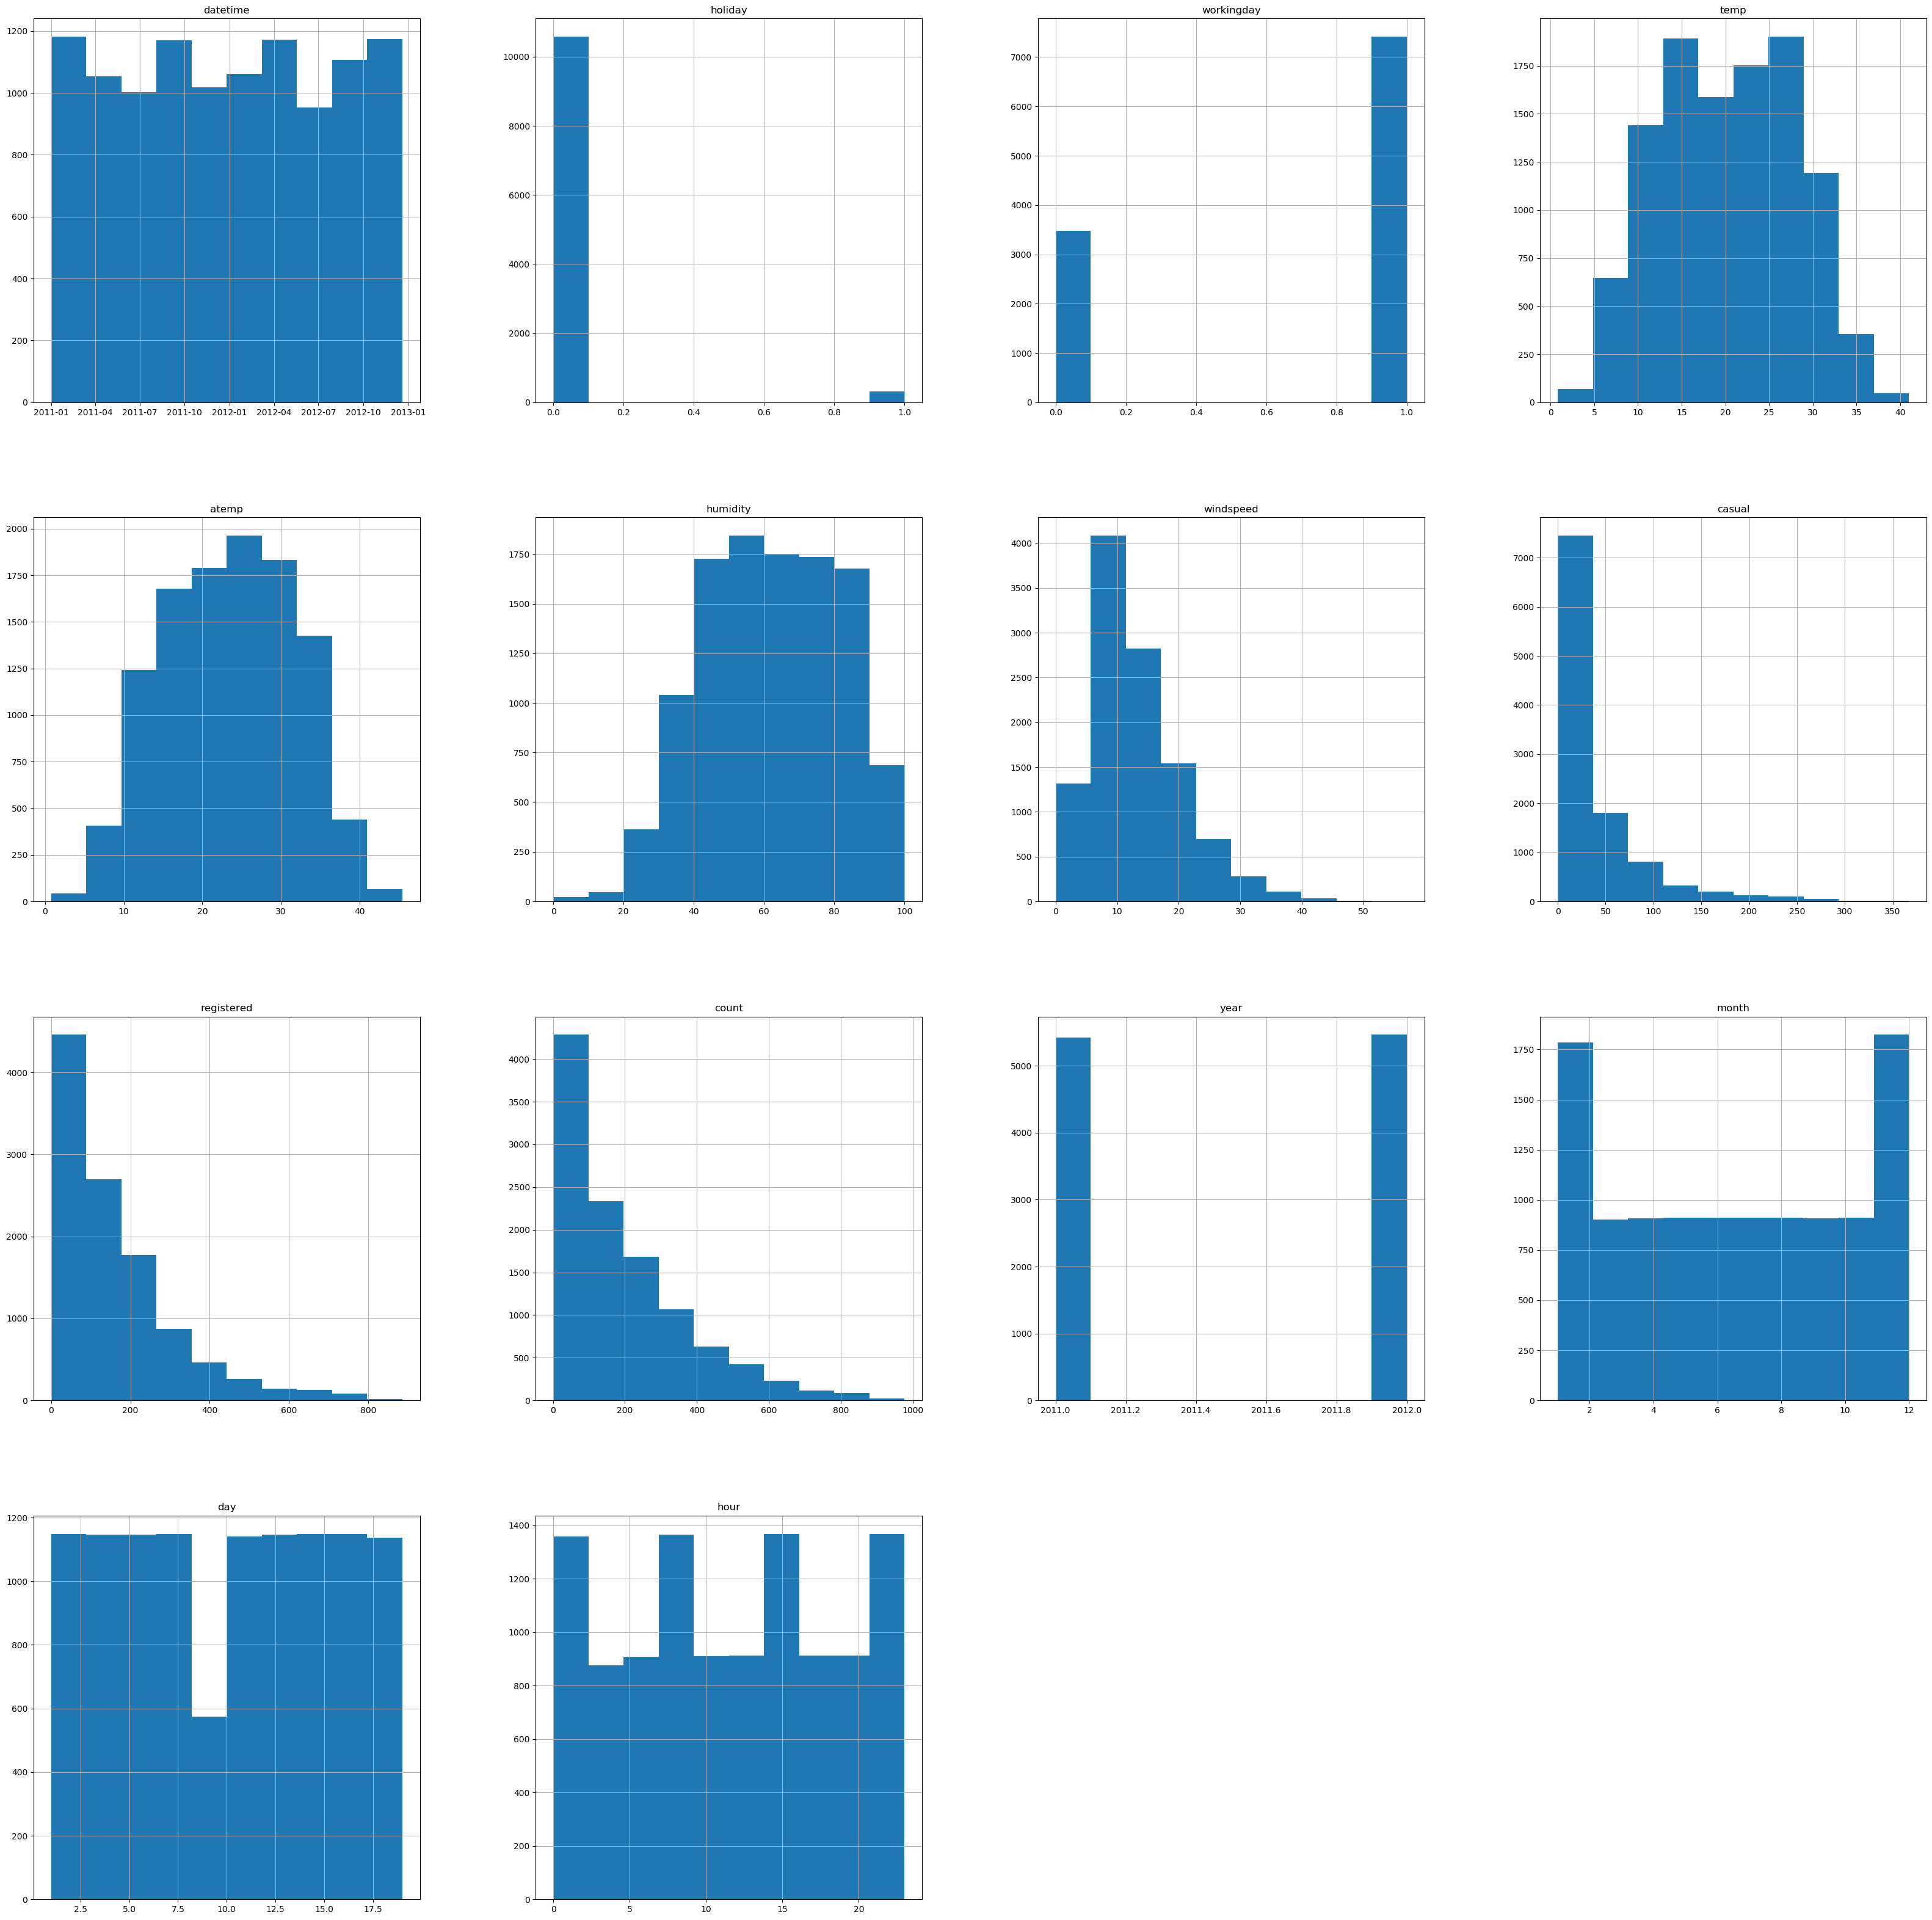

In [53]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(40,40))
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [54]:
predictor_new_features = TabularPredictor(label="count",problem_type = "regression", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": 
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230524_103316/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230524_103316/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1962.46 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

[1000]	valid_set's rmse: 35.1395
[2000]	valid_set's rmse: 33.4443
[3000]	valid_set's rmse: 33.2224
[4000]	valid_set's rmse: 33.1502
[5000]	valid_set's rmse: 33.1935
[1000]	valid_set's rmse: 36.5025
[2000]	valid_set's rmse: 34.5423
[3000]	valid_set's rmse: 34.1505
[4000]	valid_set's rmse: 33.9807
[5000]	valid_set's rmse: 33.9578
[1000]	valid_set's rmse: 35.9928
[2000]	valid_set's rmse: 34.2255
[3000]	valid_set's rmse: 33.6889
[4000]	valid_set's rmse: 33.4699
[5000]	valid_set's rmse: 33.3243
[6000]	valid_set's rmse: 33.268
[7000]	valid_set's rmse: 33.2083
[8000]	valid_set's rmse: 33.2182
[9000]	valid_set's rmse: 33.2138
[1000]	valid_set's rmse: 37.8288
[2000]	valid_set's rmse: 36.2891
[3000]	valid_set's rmse: 35.978
[4000]	valid_set's rmse: 35.8689
[5000]	valid_set's rmse: 35.8846
[1000]	valid_set's rmse: 39.2166
[2000]	valid_set's rmse: 37.1437
[3000]	valid_set's rmse: 36.7029
[4000]	valid_set's rmse: 36.649
[5000]	valid_set's rmse: 36.6295
[1000]	valid_set's rmse: 35.6761
[2000]	valid_

	-34.346	 = Validation score   (-root_mean_squared_error)
	57.8s	 = Training   runtime
	4.68s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 327.75s of the 527.77s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.1713
[2000]	valid_set's rmse: 33.0077
[1000]	valid_set's rmse: 32.8635
[2000]	valid_set's rmse: 32.6404
[1000]	valid_set's rmse: 31.9543
[2000]	valid_set's rmse: 31.343
[3000]	valid_set's rmse: 30.9039
[4000]	valid_set's rmse: 30.8612
[1000]	valid_set's rmse: 35.8483
[2000]	valid_set's rmse: 35.4773
[3000]	valid_set's rmse: 35.3993
[1000]	valid_set's rmse: 35.5388
[1000]	valid_set's rmse: 31.6283
[1000]	valid_set's rmse: 37.9327
[2000]	valid_set's rmse: 37.4577
[1000]	valid_set's rmse: 34.9434
[2000]	valid_set's rmse: 34.6719


	-33.9173	 = Validation score   (-root_mean_squared_error)
	24.6s	 = Training   runtime
	1.42s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 297.89s of the 497.91s of remaining time.
	-38.3149	 = Validation score   (-root_mean_squared_error)
	13.34s	 = Training   runtime
	0.58s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 281.29s of the 481.31s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3193.
	Ran out of time, early stopping on iteration 3220.
	Ran out of time, early stopping on iteration 3336.
	Ran out of time, early stopping on iteration 3390.
	Ran out of time, early stopping on iteration 3549.
	Ran out of time, early stopping on iteration 3679.
	Ran out of time, early stopping on iteration 3977.
	Ran out of time, early stopping on iteration 4505.
	-33.7646	 = Validation score   (-root_mean_square

[1000]	valid_set's rmse: 30.1785
[1000]	valid_set's rmse: 30.7531


	-31.2971	 = Validation score   (-root_mean_squared_error)
	12.32s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 187.03s of the 187.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-30.5578	 = Validation score   (-root_mean_squared_error)
	9.68s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 176.36s of the 176.35s of remaining time.
	-31.6016	 = Validation score   (-root_mean_squared_error)
	28.9s	 = Training   runtime
	0.59s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 144.54s of the 144.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1575.
	Ran out of time, early stopping on iteration 2109.
	-30.3949	 = Validation score   (-root_mean_squared_err

In [55]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.166999       8.404635  523.583050                0.000724           0.308759            3       True         15
1          CatBoost_BAG_L2  -30.394867       7.597275  496.935693                0.061898         126.055649            2       True         12
2          LightGBM_BAG_L2  -30.557812       7.750900  380.562686                0.215523           9.682642            2       True         10
3           XGBoost_BAG_L2  -31.072121       7.701566  375.213194                0.166189           4.333149            2       True         14
4        LightGBMXT_BAG_L2  -31.297148       7.960301  383.202851                0.424924          12.322807            2       True          9
5     ExtraTreesMSE_BAG_L2  -31.521590       8.135712  379.598415         

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446146,
  'KNeighborsDist_BAG_L1': -84.12506123181544,
  'LightGBMXT_BAG_L1': -34.34599701170081,
  'LightGBM_BAG_L1': -33.91733862651704

In [58]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(test)
new_predictions[new_predictions<0] = 0

In [59]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [60]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 471kB/s]
Successfully submitted to Bike Sharing Demand

In [61]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-24 10:52:59  new features                       complete  0.69476      0.69476       
submission.csv               2023-05-24 10:24:07  first raw submission               complete  1.74997      1.74997       
submission_new_hpo.csv       2023-05-24 07:39:57  new features with hyperparameters  complete  0.47101      0.47101       
submission_new_features.csv  2023-05-24 05:56:39  new features                       complete  0.69405      0.69405       


#### New Score of `0.69476`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [62]:
# Reference 
# from Udacity mentor's answer 
# https://knowledge.udacity.com/questions/891863
# https://pastebin.com/pTLaLmzd


import autogluon.core as ag

nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}
 
gbm_options = {
    'num_boost_round': 100,
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36)
}
 
hyperparameters = {
    'GBM': gbm_options,
    'CAT': {'iterations': 10000},
    'RF': {'n_estimators': 300},
    'XT': {'n_estimators': 300}
    # 'NN': nn_options
} 
 
hyperparameter_tune_kwargs = { 
    'scheduler': 'local',
    'searcher': 'bayesopt' 
}
 

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns":
["casual", "registered"]}).fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230524_105403/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230524_105403/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [63]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -37.035933       0.003290  76.356058                0.001354           0.194160            3       True          6
1    ExtraTrees_BAG_L2 -37.072898       0.000818  47.154779                0.000273          13.254770            2       True          5
2  WeightedEnsemble_L2 -37.112119       0.001248  34.108849                0.000703           0.208840            2       True          3
3  RandomForest_BAG_L2 -37.543357       0.001662  62.907128                0.001117          29.007119            2       True          4
4    ExtraTrees_BAG_L1 -38.295243       0.000253  12.054670                0.000253          12.054670            1       True          2
5  RandomForest_BAG_L1 -38.314947       0.000292  21.845339                0.000292          21.845339        

/opt/conda/lib/python3.7/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -38.3149466606578,
  'ExtraTrees_BAG_L1': -38.29524277410143,
  'WeightedEnsemble_L2': -37.112118584897416,
  'RandomForest_BAG_L2': -37.5433567847363,
  'ExtraTrees_BAG_L2': -37.07289817891898,
  'WeightedEnsemble_L3': -37.035932727469294},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'RandomForest_BAG_L1': 'AutogluonModels/ag-20230524_105403/models/RandomForest_BAG_L1/',
  'ExtraTrees_BAG_L1': 'AutogluonModels/ag-20230524_105403/models/ExtraTrees_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230524_105403/models/WeightedEnsemble_L2/',
  'RandomForest_BAG_L2': 'AutogluonModels/ag-20230524_105403/models/Ra

In [64]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0

In [65]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [66]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 470kB/s]
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-24 10:57:22  with hyperparameters               complete  0.47101      0.47101       
submission_new_features.csv  2023-05-24 10:52:59  new features                       complete  0.69476      0.69476       
submission.csv               2023-05-24 10:24:07  first raw submission               complete  1.74997      1.74997       
submission_new_hpo.csv       2023-05-24 07:39:57  new features with hyperparameters  complete  0.47101      0.47101       


#### New Score of `0.47101`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [74]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [52.559299, 30.166999, 37.035933]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [75]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.74997, 0.69476, 0.47101]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')


### Hyperparameter table

In [76]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": [600, 600, 600],
    "presets": ['best_quality', 'best_quality','best_quality'],
    "hp-method": ['none', 'regression', 'tabular_autogluon'],
    "score": [1.74997, 0.69476, 0.47101]
})




,model,timelimit,presets,hp-method,score
0,initial,600,best_quality,none,1.74997
1,add_features,600,best_quality,regression,0.69476
2,hpo,600,best_quality,tabular_autogluon,0.47101
